# Meteorological data from fluxtowers
The meteorological data from SILO was replaced by the fluxtower meteorological data for the years there is data. The VOM was run:


1) with parameters obtained by optimizing with just SILO-data, and meteorological data corrected with fluxtower-data

2) with parameters obtained by optimizing with meteorological data corrected with fluxtower-data

## Weatherdata


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date

In [3]:
weather_silo = np.genfromtxt("../../data/VOM_input/HowardSprings/dailyweather.prn", names=True)
time_silo = np.arange(datetime(int(weather_silo["Year"][0]),int(weather_silo["Month"][0]),int(weather_silo["Day"][0])), 
                  datetime(int(weather_silo["Year"][-1]),int(weather_silo["Month"][-1]),int(weather_silo["Day"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)

weather_dingo = np.genfromtxt("../../work/additional_analyses/sens_weatherdata/1_dingo/input/dailyweather.prn", names=True)
time_dingo = np.arange(datetime(int(weather_dingo["Year"][0]),int(weather_dingo["Month"][0]),int(weather_dingo["Day"][0])), 
                  datetime(int(weather_dingo["Year"][-1]),int(weather_dingo["Month"][-1]),int(weather_dingo["Day"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


<Figure size 1152x576 with 0 Axes>

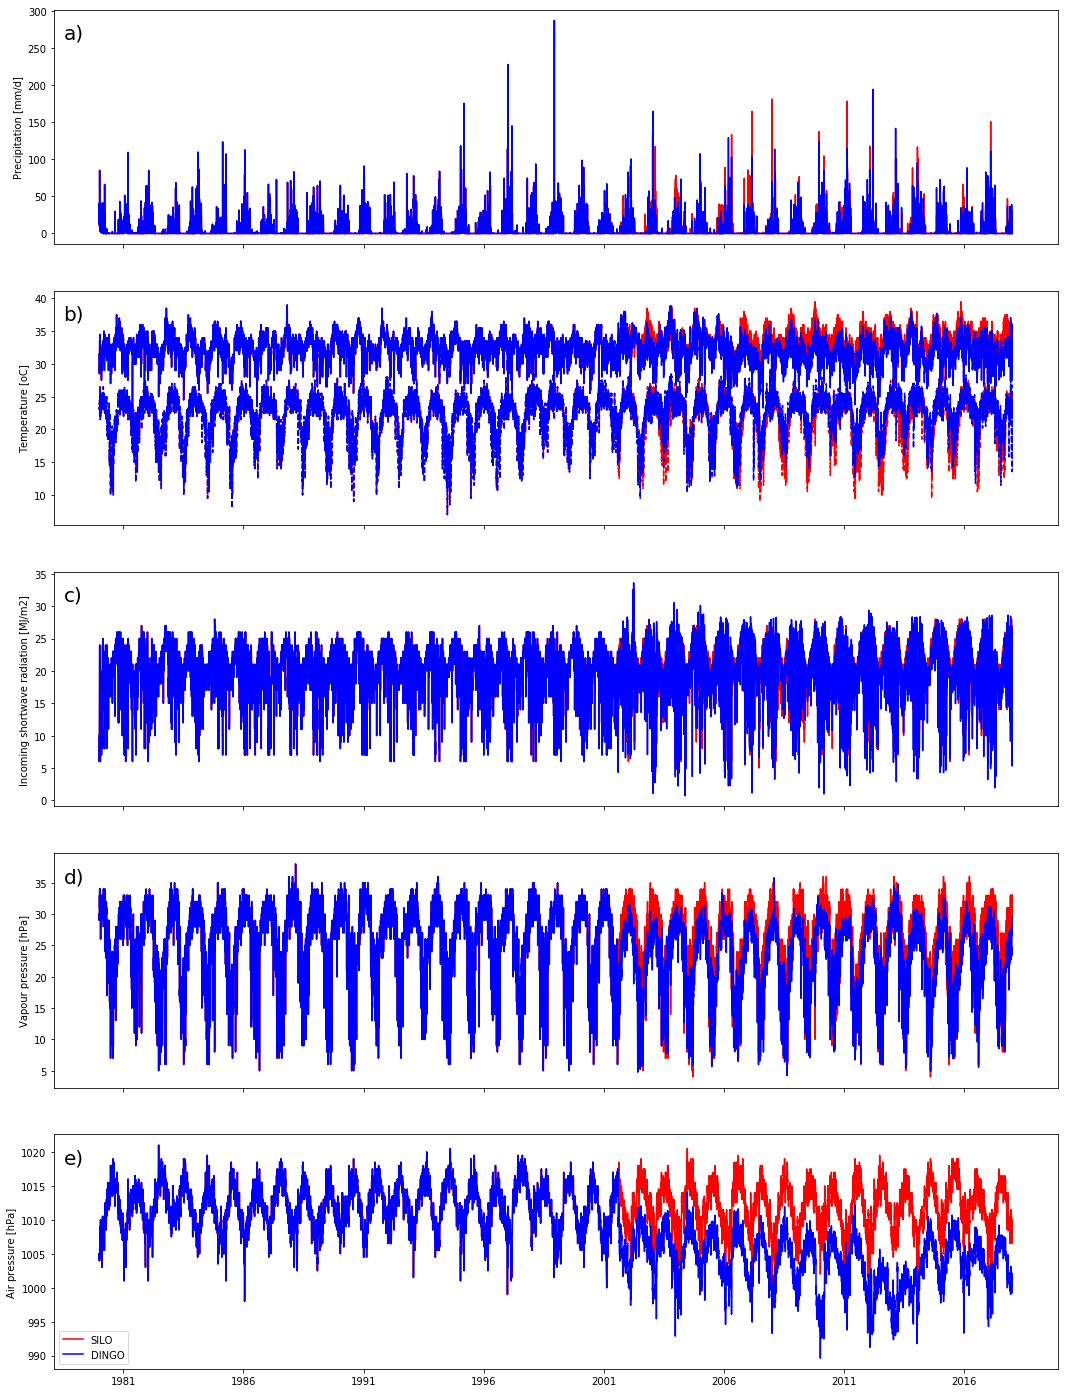

In [4]:
#rainfall

fig=plt.figure(figsize=(16,8), facecolor='w', edgecolor='k' )
fig, ax   = plt.subplots(nrows=5, ncols=1, figsize=(18, 25), sharex=True)   

ax[0].plot(time_silo, weather_silo["Rain"], color="red", label="SILO", zorder=1)           
ax[0].plot(time_dingo, weather_dingo["Rain"], color="blue", label="DINGO", zorder=1)   
ax[0].set_ylabel("Precipitation [mm/d]")
ax[0].text(0.01, 0.9, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)

#max. temperature
ax[1].plot(time_silo, weather_silo["TMax"], color="red", label="SILO Tmax", zorder=1)   
ax[1].plot(time_silo, weather_silo["TMin"],"--" ,color="red", label="SILO Tmin", zorder=1)           

ax[1].plot(time_dingo, weather_dingo["TMax"], color="blue", label="DINGO Tmax", zorder=1)   
ax[1].plot(time_dingo, weather_dingo["TMin"],"--" ,color="blue", label="DINGO Tmin", zorder=1)   
ax[1].set_ylabel("Temperature [oC]")
ax[1].text(0.01, 0.9, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)


ax[2].plot(time_silo, weather_silo["Radn"], color="red", label="SILO", zorder=1)           
ax[2].plot(time_dingo, weather_dingo["Radn"], color="blue", label="DINGO", zorder=1)   
ax[2].set_ylabel("Incoming shortwave radiation [MJ/m2]")
ax[2].text(0.01, 0.9, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

ax[3].plot(time_silo, weather_silo["VP"], color="red", label="SILO", zorder=1)           
ax[3].plot(time_dingo, weather_dingo["VP"], color="blue", label="DINGO", zorder=1)   
ax[3].set_ylabel("Vapour pressure [hPa]")
ax[3].text(0.01, 0.9, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

ax[4].plot(time_silo, weather_silo["Pres"], color="red", label="SILO", zorder=1)           
ax[4].plot(time_dingo, weather_dingo["Pres"], color="blue", label="DINGO", zorder=1)   
ax[4].set_ylabel("Air pressure [hPa]")
ax[4].text(0.01, 0.9, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

plt.legend()
plt.show()




**Figure S8.1.** Timeseries for Howard Springs of a) precipitation, b) daily minimum and maximum temperatures, c) incoming shortwave radiation, d) vapour pressure and e) air pressure. Only air pressures show strong differences for the SILO and the DINGO data.

## Timeseries of evaporation

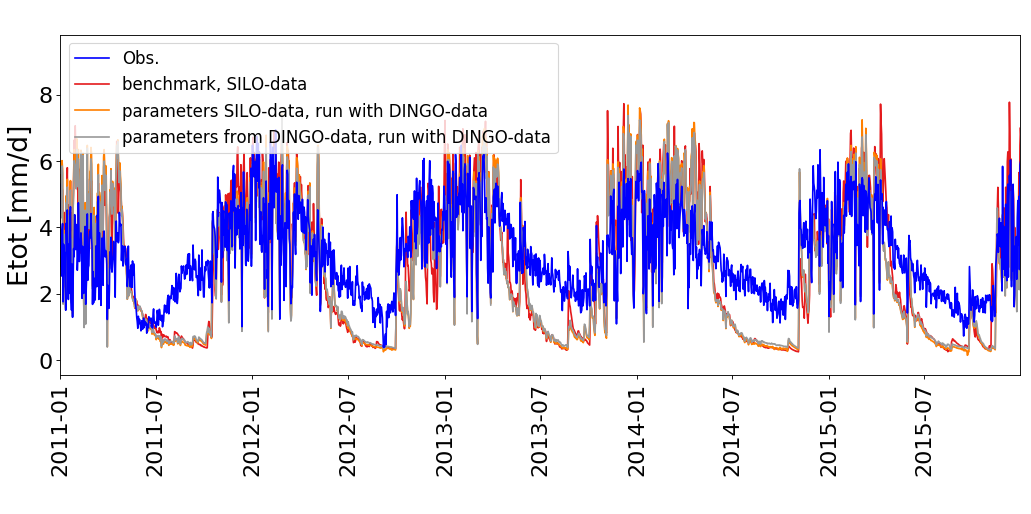

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/1_dingo/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/2_dingo_sce/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "benchmark, SILO-data" "parameters SILO-data, run with DINGO-data" "parameters from DINGO-data, run with DINGO-data" --legend True  \
--palette Set1


**Figure S8.2.** Evaporation at HowardSprings, with the benchmark data as the VOM model-runs (red), evaporation after replacing part of the input data with fluxtower data and using the same vegetation parameters as the benchmark set is displayed in orange, whereas a new SCE-run with input data partially based on fluxtower data in grey. The differences between the model runs are rather small.

## Timeseries of assimilation


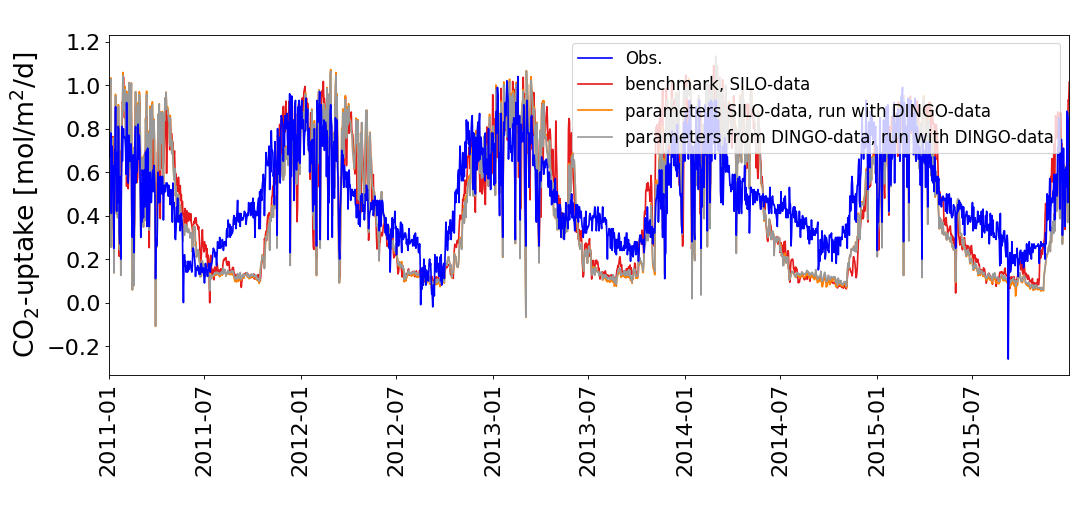

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/1_dingo/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/2_dingo_sce/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "benchmark, SILO-data" "parameters SILO-data, run with DINGO-data" "parameters from DINGO-data, run with DINGO-data" --legend True  \
--palette Set1



**Figure S8.3.** Assimilation at HowardSprings, with the benchmark data as the VOM model-runs (red), evaporation after replacing part of the input data with fluxtower data and using the same vegetation parameters as the benchmark set is displayed in orange, whereas a new SCE-run with input data partially based on fluxtower data in grey. The differences between the model runs are rather small.